In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

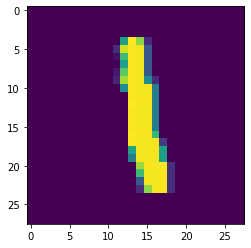

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[6])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])
#              optimizer='rmsprop',
#              loss=None,
#              loss_weights=None,
#            #weighted_metrics=None,  #List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
#              run_eagerly=None,
#              steps_per_execution=None,
#              jit_compile=None,
#              **kwargs)

In [17]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2769 - accuracy: 0.9180 - val_loss: 0.1476 - val_accuracy: 0.9555
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1152 - accuracy: 0.9658 - val_loss: 0.1065 - val_accuracy: 0.9675
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0799 - accuracy: 0.9755 - val_loss: 0.1167 - val_accuracy: 0.9665
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.1181 - val_accuracy: 0.9650
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0951 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.1002 - val_accuracy: 0.9722
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.1035 - val_accuracy:

In [18]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.9782

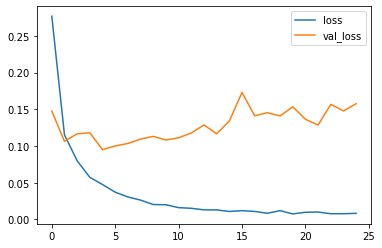

In [25]:
plt.plot(history.history["loss"],label='loss')

plt.plot(history.history["val_loss"],label='val_loss')

plt.legend()

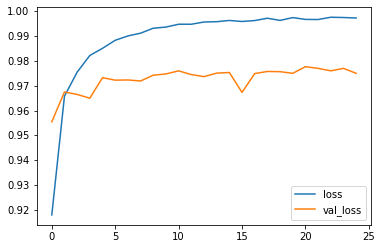

In [29]:
plt.plot(history.history["accuracy"],label='loss')
plt.plot(history.history["val_accuracy"],label='val_loss')
plt.legend()

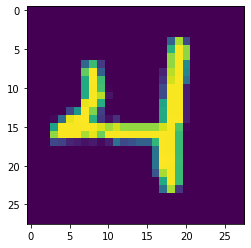

In [30]:
plt.imshow(X_test[103])

In [31]:
new_pred=model.predict(X_test[103].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


In [32]:
print("Writing Char is:",new_pred)

Writing Char is: [4]
